# MovieLens Data #

## Section B-Story ##

## import modules ##

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

## Graph 1(Ratings vs Genre) ##

## Load Data ##

In [191]:
uitem = pd.read_csv('/home/user/Downloads/ml-100k/u.item', 
                 names = ['item id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action',
                'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film Noir',
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci Fi', 'Thriller', 'War', 'Western'],
                sep= '|',
                header = None,
                encoding = "ISO-8859-1")
uuser = pd.read_csv('/home/user/Downloads/ml-100k/u.user', 
                  sep = '|',
                  header = None,
                  names = ['user id','age','gender','occupation','zip code'])
udata = pd.read_table('/home/user/Downloads/ml-100k/u.data',
                    header = None,
                    names = ['user id','item id','rating','timestamp'])

## Drop Columns ##

In [192]:
uitem.drop(['movie title','release date','video release date','IMDb URL','unknown'], axis = 1,inplace = True)
udata.drop(['timestamp'], axis = 1,inplace = True)

## Merge Data ##

In [193]:
merge1 = udata.merge(uitem)

## Graph Plot ##

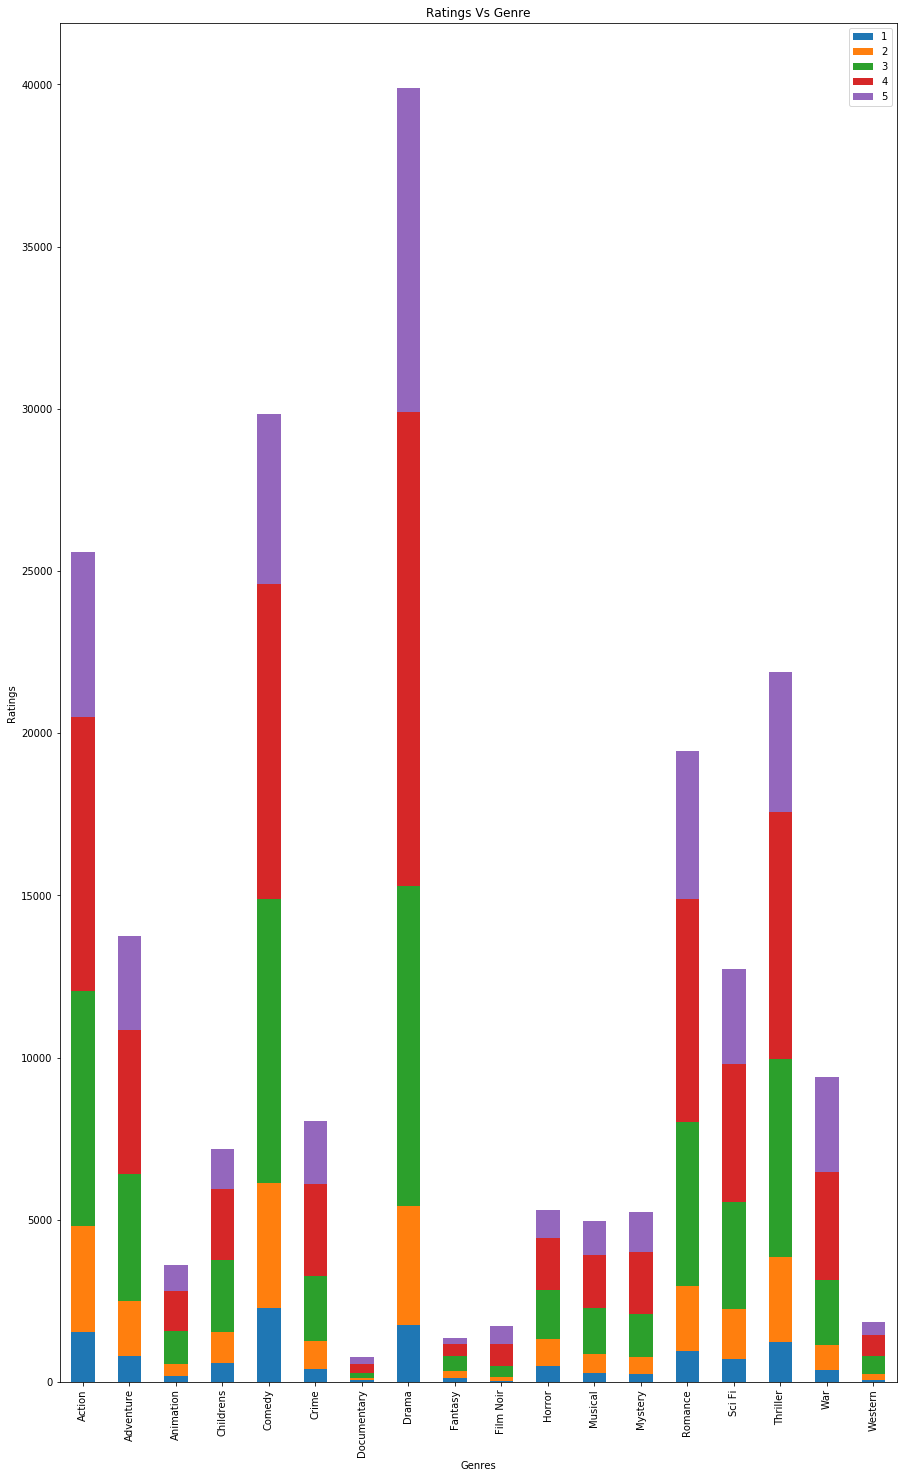

In [194]:
rows = ['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
      'Fantasy', 'Film Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci Fi', 'Thriller', 'War', 'Western']
for i in range(len(rows)):
    merge1[rows[i]] = merge1[rows[i]]*merge1['rating']
merge1.drop(['user id','item id','rating'],axis=1,inplace=True) 
df=pd.DataFrame(index = rows, columns = [1,2,3,4,5])
for j in range(len(rows)):
    for k in range(5):
        df.loc[rows[j],k+1]=merge1.loc[merge1[rows[j]]==(k+1),rows[j]].count()
df.plot.bar(stacked=True,figsize=(15,25))
plt.xlabel('Genres')
plt.ylabel('Ratings')
plt.title('Ratings Vs Genre')
plt.show()        

## Graph 2(Occupation vs Genre) ##

## Load Data ##

In [58]:
uitem = pd.read_csv('/home/user/Downloads/ml-100k/u.item', 
                 names = ['item id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action',
                'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film Noir',
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci Fi', 'Thriller', 'War', 'Western'],
                sep= '|',
                header = None,
                encoding = "ISO-8859-1")
uuser = pd.read_csv('/home/user/Downloads/ml-100k/u.user', 
                  sep = '|',
                  header = None,
                  names = ['user id','age','gender','occupation','zip code'])
udata = pd.read_table('/home/user/Downloads/ml-100k/u.data',
                    header = None,
                    names = ['user id','item id','rating','timestamp'])
uoccupation = pd.read_csv('/home/user/Downloads/ml-100k/u.occupation',
                          header = None,
                          names = ['occupation'])

## Drop Columns ##

In [59]:
uitem.drop(['movie title','release date','video release date','IMDb URL','unknown'], axis = 1,inplace = True)
udata.drop(['timestamp'], axis = 1,inplace = True)
uuser.drop(['zip code'], axis = 1,inplace = True)

## Merge Data ##

In [60]:
merge1 = udata.merge(uuser)
merge2 = merge1.merge(uitem)

## Graph Plot ##

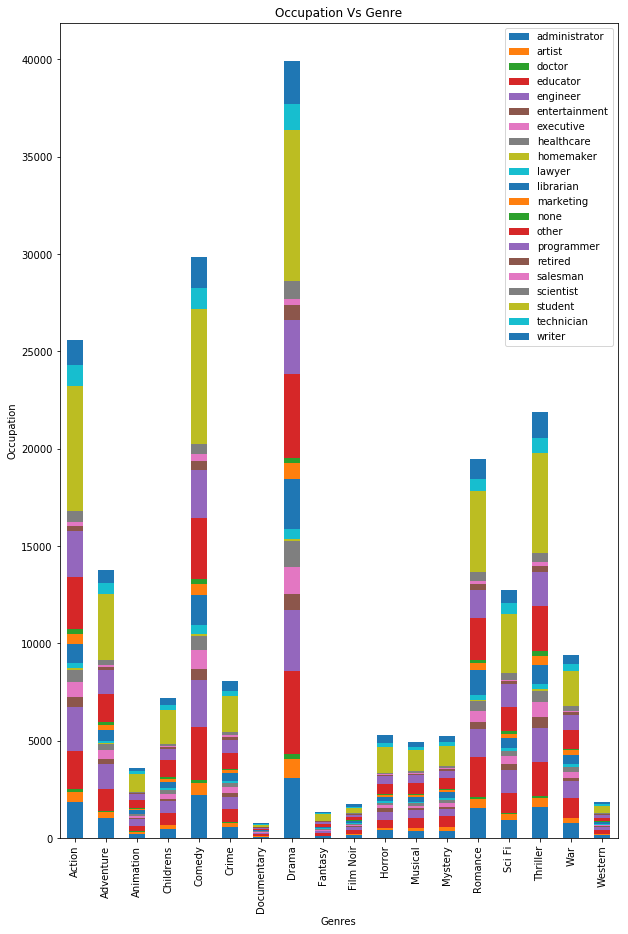

In [61]:
rows = ['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
      'Fantasy', 'Film Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci Fi', 'Thriller', 'War', 'Western']
occupationl = uoccupation['occupation'].tolist()
df=pd.DataFrame(index = rows, columns = occupationl)
for i in range(len(rows)):
    s=merge2.groupby('occupation')[rows[i]].sum()
    k=0
    for j in list(s.index):
        df.loc[rows[i],j]=s.tolist()[k]
        k=k+1
df.plot.bar(stacked=True,figsize=(10,15))
plt.xlabel('Genres')
plt.ylabel('Occupation')
plt.title('Occupation Vs Genre')
plt.show()  
        
    

## Graph Plot(Documnetary,Fantasy,Film Noir,Western) ##

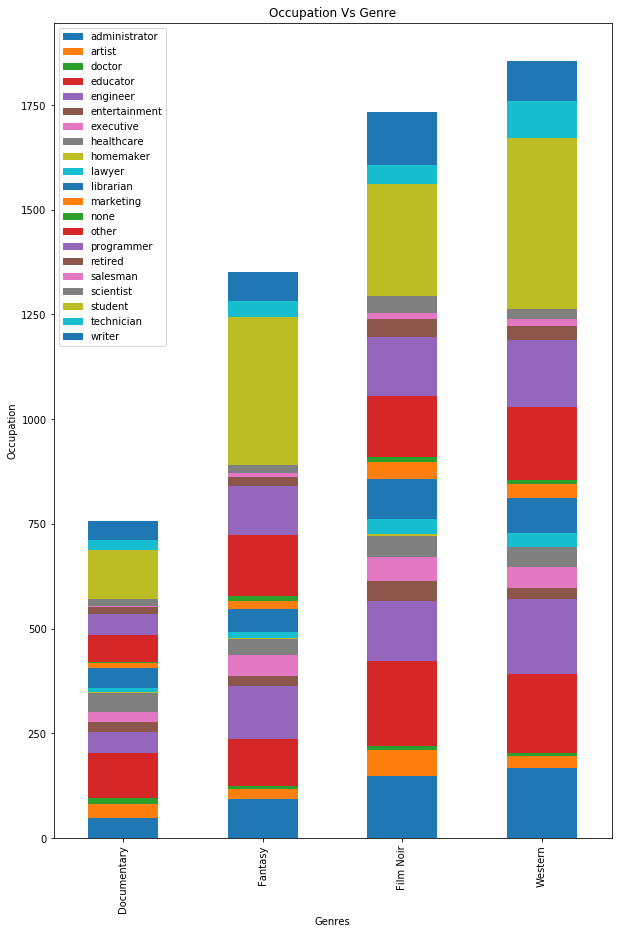

In [65]:
df.loc[['Documentary','Fantasy','Film Noir','Western'],:].plot.bar(stacked=True,figsize=(10,15))
plt.xlabel('Genres')
plt.ylabel('Occupation')
plt.title('Occupation Vs Genre')
plt.show()

## Graph 3(Age vs Genre) ## 

## Load Data ##

In [32]:
uitem = pd.read_csv('/home/user/Downloads/ml-100k/u.item', 
                 names = ['item id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action',
                'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film Noir',
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci Fi', 'Thriller', 'War', 'Western'],
                sep= '|',
                header = None,
                encoding = "ISO-8859-1")
uuser = pd.read_csv('/home/user/Downloads/ml-100k/u.user', 
                  sep = '|',
                  header = None,
                  names = ['user id','age','gender','occupation','zip code'])
udata = pd.read_table('/home/user/Downloads/ml-100k/u.data',
                    header = None,
                    names = ['user id','item id','rating','timestamp'])

## Drop Columns ##

In [33]:
uitem.drop(['movie title','release date','video release date','IMDb URL','unknown'], axis = 1,inplace = True)
udata.drop(['rating','timestamp'], axis = 1,inplace = True)
uuser.drop(['gender','occupation','zip code'], axis = 1,inplace = True)

## Merge Data ##

In [34]:
merge1 = udata.merge(uuser)
merge2 = merge1.merge(uitem)

## Graph Plot ##

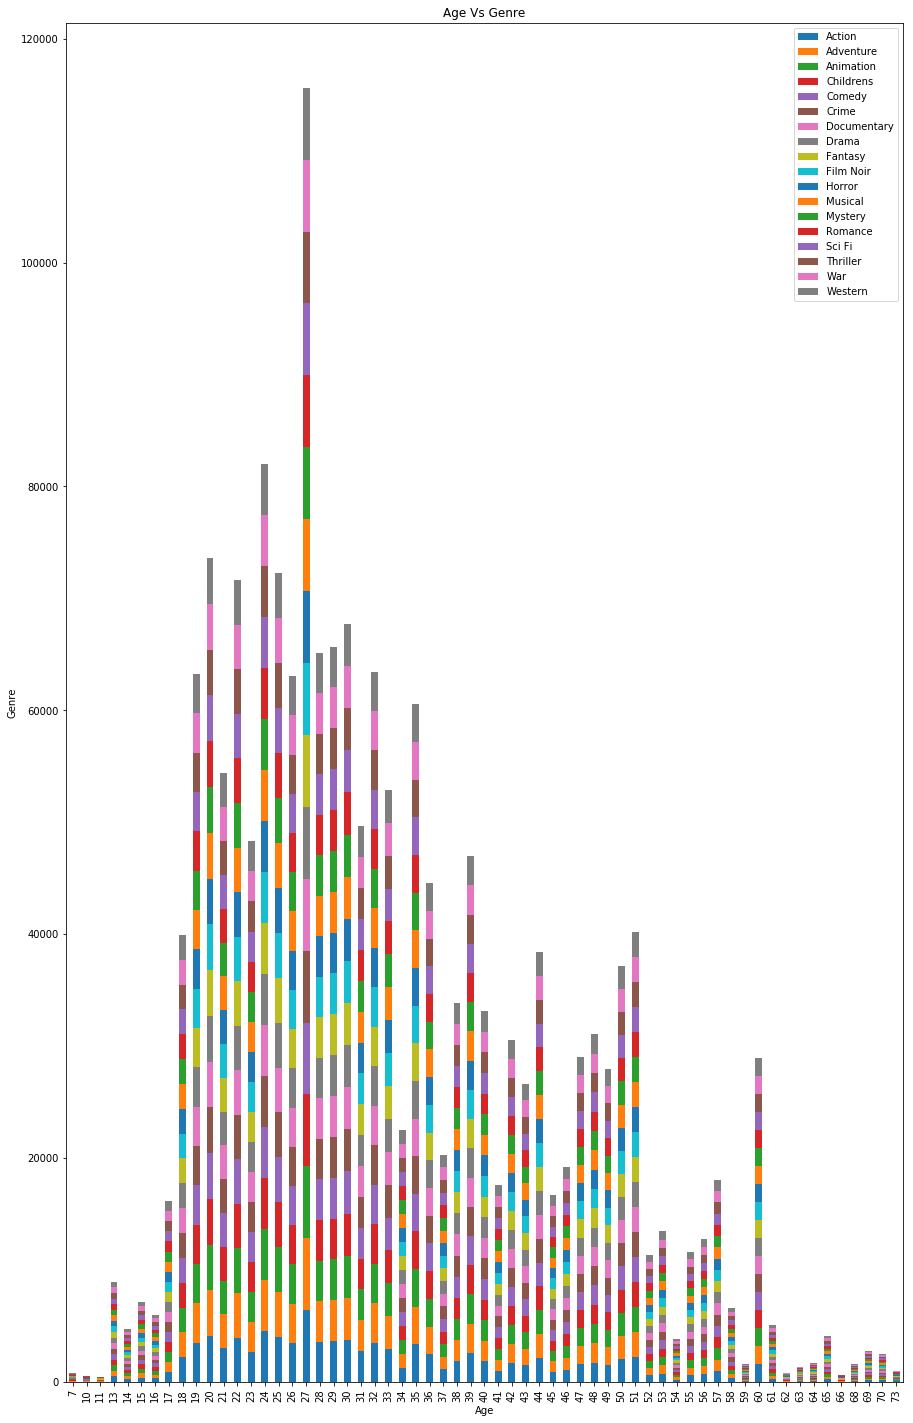

In [35]:
x = merge2.groupby('age').count()
x.drop(['user id','item id'],axis=1,inplace=True)
x.plot.bar(stacked=True,figsize=(15,25))
plt.xlabel('Age')
plt.ylabel('Genre')
plt.title('Age Vs Genre')
plt.show()  